In [111]:
# Python standard modules
import sys
from os import mkdir
from os.path import join
from os.path import isdir
from os.path import isfile
from shutil import rmtree

# Community Packages
import numpy as np
import pandas as pd

# My packages
sys.path.insert(0, "../scs/")
from data_loading import load_sn_data
from data_preparation import extract_dataframe
import data_plotting as dplt

sys.path.insert(0, "../scs/models")
import feed_forward

from importlib import reload

In [147]:
file = "/lustre/lrspec/users/2649/spectralib/100/df_tst.parquet"
file = "../data/sn_data.parquet"
df = load_sn_data(file)
df

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-8.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-7.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-6.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-4.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2008ar,Ia-norm,0,Ia,0,-3.70,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sn2007uy,Ib-pec,9,Ib,1,12.82,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2007uy,Ib-pec,9,Ib,1,45.82,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sn2007uy,Ib-pec,9,Ib,1,54.82,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
df = df.loc["sn94D"]

df = df.loc[np.isclose(df["Spectral Phase"], 14, rtol=0, atol=1)]

In [141]:
data = extract_dataframe(df)
index = data[0]  # SN Name for each spectrum
wvl0 = data[1]  # Wavelength array
flux0_columns = data[2]  # Columns that index the fluxes in the dataframe
metadata_columns = data[3]  # Columns that index the metadata
df_fluxes0 = data[4]  # Sub-dataframe containing only the fluxes
df_metadata = data[5]  # Sub-dataframe containing only the metadata
fluxes0 = data[6]  # Only the flux values in a numpy array

In [142]:
df_metadata

,SN Maintype,SN Maintype ID,SN Subtype,SN Subtype ID,Spectral Phase
SN Name,,,,,
sn94D,Ia,0,Ia-norm,0,13.2
sn94D,Ia,0,Ia-norm,0,13.4
sn94D,Ia,0,Ia-norm,0,14.3


In [143]:
ind = 0

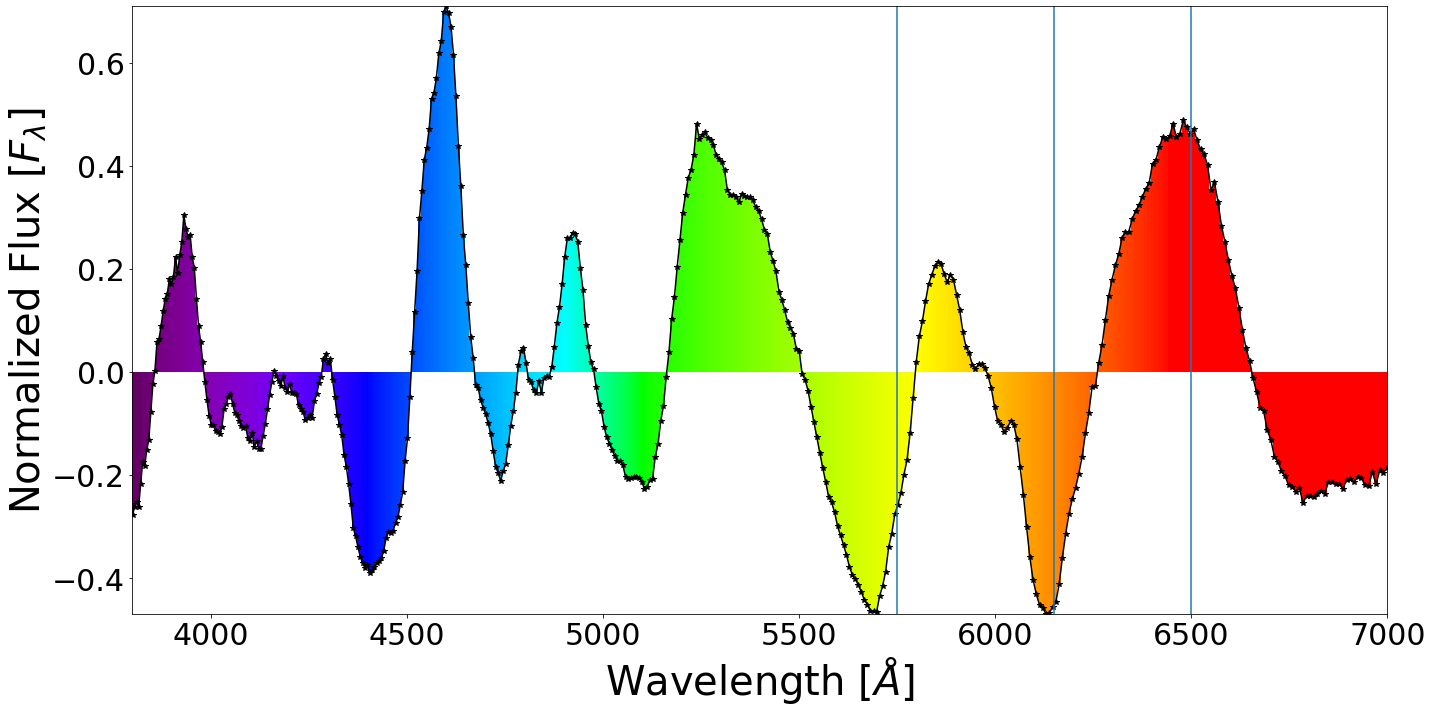

In [146]:
reload(dplt)

flux = fluxes0[ind]
# flux = (flux - flux.min()) / (flux.max() - flux.min())
# flux -= flux.min()

fig, ax = dplt.plotSpec(wvl0, flux)
ax.axvline(x=6150, label="Si II")
ax.axvline(x=5750, label="Si II")
ax.axvline(x=6500, label="Fe II")

In [136]:
from astropy import units as u
from astropy import constants as c
cz = 850 * u.km / u.s
z = cz / c.c
z.decompose()

<Quantity 0.00283529>